In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
application_data=pd.read_csv(r'C:\Users\yasha\Downloads\application_data.csv')
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
application_data.shape

(307511, 122)

In [6]:
#Checking the null values
application_data_df=application_data.isnull().sum()/len(application_data)*100
application_data_df

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [7]:
#checking the null values grater than 50%
grater=application_data_df[application_data_df>=50]
grater


OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [8]:
grater.size

41

In [9]:
#droping the missing value
application_data_df=application_data.drop(columns=grater.index)
application_data_df.shape

(307511, 81)

In [10]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [11]:
application_data_df.isnull().sum()/len(application_data_df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [12]:
#find the unique values of each colum
print("AMT_REQ_CREDIT_BUREAU_DAY unique values:",application_data_df['AMT_REQ_CREDIT_BUREAU_DAY'].nunique())
print("AMT_REQ_CREDIT_BUREAU_WEEK unique values:",application_data_df['AMT_REQ_CREDIT_BUREAU_WEEK'].nunique())
print("AMT_REQ_CREDIT_BUREAU_MON unique values:",application_data_df['AMT_REQ_CREDIT_BUREAU_MON'].nunique())
print("AMT_REQ_CREDIT_BUREAU_QRT unique values:",application_data_df['AMT_REQ_CREDIT_BUREAU_QRT'].nunique())
print("AMT_REQ_CREDIT_BUREAU_YEAR unique values:",application_data_df['AMT_REQ_CREDIT_BUREAU_YEAR'].nunique())

AMT_REQ_CREDIT_BUREAU_DAY unique values: 9
AMT_REQ_CREDIT_BUREAU_WEEK unique values: 9
AMT_REQ_CREDIT_BUREAU_MON unique values: 24
AMT_REQ_CREDIT_BUREAU_QRT unique values: 11
AMT_REQ_CREDIT_BUREAU_YEAR unique values: 25


These values gives sense that they may be categorical values, it has
unique values in most of the columns

In [13]:
#lets check the values in columns
application_data_df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [14]:
application_data_df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [15]:
application_data_df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [16]:
application_data_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [17]:
application_data_df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

As per given description, these values meant to be days,hrs,months and
years ..these columns are categorical.

In [18]:
# imuting the colums od data set
application_data_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

\#\#droping the unwanted colums

In [19]:
unwanted=['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_FAMILY_STATUS','REGION_POPULATION_RELATIVE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [20]:
application_data_df.drop(columns=unwanted,inplace=True)
application_data_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE  ... DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0          Working  ...                      2.0                      2.0   
1    State servant  ...                      0.0                      1.0   
2          Working  ...                      0.0                      0.0   
3          Working  ...                      0.0                      2.0   
4          Working  ...                      0.0                      0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                 -1134.0   
1                       0.0                  -828.0   
2                       0.0                  -815.0   
3                       0.0                  -617.0   
4                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                       0.0                         1.0  
1                       0.0                         0.0  
2                       0.0                         0.0  
3                       NaN                         NaN  
4                       0.0                         0.0  

[5 rows x 30 columns]

In [21]:
application_data_df.shape

(307511, 30)

In [22]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   CNT_CHILDREN                307511 non-null  int64  
 5   AMT_INCOME_TOTAL            307511 non-null  float64
 6   AMT_CREDIT                  307511 non-null  float64
 7   AMT_ANNUITY                 307499 non-null  float64
 8   AMT_GOODS_PRICE             307233 non-null  float64
 9   NAME_INCOME_TYPE            307511 non-null  object 
 10  NAME_EDUCATION_TYPE         307511 non-null  object 
 11  NAME_HOUSING_TYPE           307511 non-null  object 
 12  DAYS_BIRTH                  307511 non-null  int64  
 13  DAYS_EMPLOYED 

# lets convert data type from numerical to catagory

In [23]:
application_data_df.nunique().sort_values()

TARGET                             2
NAME_CONTRACT_TYPE                 2
EMERGENCYSTATE_MODE                2
CODE_GENDER                        3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_60_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_DAY          9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_YEAR        25
OBS_30_CNT_SOCIAL_CIRCLE          33
OBS_60_CNT_SOCIAL_CIRCLE          33
ORGANIZATION_TYPE                 58
AMT_GOODS_PRICE                 1002
AMT_INCOME_TOTAL                2548
DAYS_LAST_PHONE_CHANGE          3773
AMT_CREDIT                      5603
DAYS_ID_PUBLISH                 6168
DAYS_EMPLOYED                  12574
AMT_ANNUITY                    13672
D

In [24]:
application_data_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE     DAYS_BIRTH  \
count  3.075110e+05  307499.000000     3.072330e+05  307511.000000   
mean   5.990260e+05   27108.573909     5.383962e+05  -16036.995067   
std    4.024908e+05   14493.737315     3.694465e+05    4363.988632   
min    4.500000e+04    1615.500000     4.050000e+04  -25229.000000   
25%    2.700000e+05   16524.000000     2.385000e+05  -19682.000000   
50%    5.135310e+05   24903.000000     4.500000e+05  -15750.000000   
75%    8.086500e+05   34596.000000     6.795000e+05  -12413.000000   
max    4.050000e+06  258025.500000     4.050000e+06   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  ...  DEF_30_CNT_SOCIAL_CIRCLE  \
count  307511.000000      307511.000000  ...             306490.000000   
mean    63815.045904       -4986.120328  ...                  0.143421   
std    141275.766519        3522.886321  ...                  0.446698   
min    -17912.000000      -24672.000000  ...                  0.000000   
25%     -2760.000000       -7479.500000  ...                  0.000000   
50%     -1213.000000       -4504.000000  ...                  0.000000   
75%      -289.000000       -2010.000000  ...                  0.000000   
max    365243.000000           0.000000  ...                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.405292                  0.100049   
std                    2.379803                  0.362291   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           307510.000000               265992.000000   
mean              -962.858788                    0.006402   
std                826.808487                    0.083849   
min              -4292.000000                    0.000000   
25%              -1570.000000                    0.000000   
50%               -757.000000                    0.000000   
75%               -274.000000                    0.000000   
max                  0.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%     

In [25]:
application_data_df.nunique().index

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [26]:
catagor=['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER','CNT_CHILDREN','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE', 'ORGANIZATION_TYPE','EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [27]:
for i in catagor:
    application_data_df[i]=application_data_df[i].astype('category')

In [28]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  category
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   CNT_CHILDREN                307511 non-null  category
 5   AMT_INCOME_TOTAL            307511 non-null  float64 
 6   AMT_CREDIT                  307511 non-null  float64 
 7   AMT_ANNUITY                 307499 non-null  float64 
 8   AMT_GOODS_PRICE             307233 non-null  float64 
 9   NAME_INCOME_TYPE            307511 non-null  category
 10  NAME_EDUCATION_TYPE         307511 non-null  category
 11  NAME_HOUSING_TYPE           307511 non-null  category
 12  DAYS_BIRTH                  307511 non-null  int64   
 13 

In [29]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  category
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   CNT_CHILDREN                307511 non-null  category
 5   AMT_INCOME_TOTAL            307511 non-null  float64 
 6   AMT_CREDIT                  307511 non-null  float64 
 7   AMT_ANNUITY                 307499 non-null  float64 
 8   AMT_GOODS_PRICE             307233 non-null  float64 
 9   NAME_INCOME_TYPE            307511 non-null  category
 10  NAME_EDUCATION_TYPE         307511 non-null  category
 11  NAME_HOUSING_TYPE           307511 non-null  category
 12  DAYS_BIRTH                  307511 non-null  int64   
 13 

In [30]:
application_data_df['DAYS_BIRTH']=application_data_df['DAYS_BIRTH'].abs()/365
application_data_df['DAYS_EMPLOYED']=application_data_df['DAYS_EMPLOYED'].abs()/365
application_data_df['DAYS_REGISTRATION']=application_data_df['DAYS_REGISTRATION'].abs()/365
application_data_df['DAYS_ID_PUBLISH']=application_data_df['DAYS_ID_PUBLISH'].abs()/365

In [31]:
application_data_df.describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05   
mean       1.687979e+05  5.990260e+05   27108.573909     5.383962e+05   
std        2.371231e+05  4.024908e+05   14493.737315     3.694465e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  
count  307511.000000  307511.000000      307511.000000    307511.000000  
mean       43.936973     185.547239          13.660604         8.203294  
std        11.956133     382.037676           9.651743         4.135481  
min        20.517808       0.000000           0.000000         0.000000  
25%        34.008219       2.556164           5.506849         4.712329  
50%        43.150685       6.079452          12.339726         8.915068  
75%        53.923288      15.635616          20.491781        11.778082  
max        69.120548    1000.665753          67.594521        19.717808

In [32]:
##let's see a heat mape
application_data_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [33]:
application_data_df['TARGET'].describe()

count     307511
unique         2
top            0
freq      282686
Name: TARGET, dtype: int64

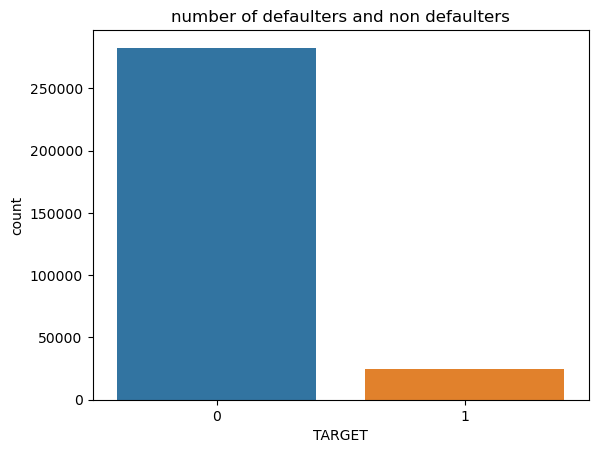

In [90]:
sns.countplot(application_data_df['TARGET'])
plt.title("number of defaulters and non defaulters")
plt.show()

In [35]:
application_data_df['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

## now we can check the imbalace of TARGET

In [36]:
# Create a new data frame
target_0=application_data_df[application_data_df['TARGET']==0]
target_0.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER CNT_CHILDREN  \
1     100003      0         Cash loans           F            0   
2     100004      0    Revolving loans           M            0   
3     100006      0         Cash loans           F            0   
4     100007      0         Cash loans           M            0   
5     100008      0         Cash loans           M            0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   
5           99000.0    490495.5      27517.5         454500.0   

  NAME_INCOME_TYPE  ... DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
1    State servant  ...                      0.0                      1.0   
2          Working  ...                      0.0                      0.0   
3          Working  ...                      0.0                      2.0   
4          Working  ...                      0.0                      0.0   
5    State servant  ...                      0.0                      0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
1                       0.0                  -828.0   
2                       0.0                  -815.0   
3                       0.0                  -617.0   
4                       0.0                 -1106.0   
5                       0.0                 -2536.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  
1                       0.0                        0.0  
2                       0.0                        0.0  
3                       NaN                        NaN  
4                       0.0                        0.0  
5                       1.0                        1.0  

[5 rows x 30 columns]

In [37]:
target_0.shape

(282686, 30)

In [38]:
target_1=application_data_df[application_data_df['TARGET']==1]
target_1.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER CNT_CHILDREN  \
0      100002      1         Cash loans           M            0   
26     100031      1         Cash loans           F            0   
40     100047      1         Cash loans           M            0   
42     100049      1         Cash loans           F            0   
81     100096      1         Cash loans           F            0   

    AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           202500.0    406597.5      24700.5         351000.0   
26          112500.0    979992.0      27076.5         702000.0   
40          202500.0   1193580.0      35028.0         855000.0   
42          135000.0    288873.0      16258.5         238500.0   
81           81000.0    252000.0      14593.5         252000.0   

        NAME_INCOME_TYPE  ... DEF_30_CNT_SOCIAL_CIRCLE  \
0                Working  ...                      2.0   
26               Working  ...                      1.0   
40  Commercial associate  ...                      0.0   
42               Working  ...                      0.0   
81             Pensioner  ...                      1.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
26                     10.0                       0.0                  -161.0   
40                      0.0                       0.0                 -1075.0   
42                      1.0                       0.0                 -1480.0   
81                      1.0                       1.0                     0.0   

    AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                          0.0                        0.0   
26                         0.0                        0.0   
40                         0.0                        0.0   
42                         0.0                        0.0   
81                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                       0.0   
26                        0.0                       0.0   
40                        0.0                       2.0   
42                        0.0                       0.0   
81                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                        1.0  
26                       2.0                        2.0  
40                       0.0                        4.0  
42                       0.0                        2.0  
81                       0.0                        0.0  

[5 rows x 30 columns]

In [39]:
target_1.shape

(24825, 30)

In [40]:
ratio=target_0.shape[0]/target_1.shape[0]
ratio

11.387150050352467

In [41]:
#through this ratio, we can conclude that there was almost 11 number of 0's for every 1.


## Now find the correaltion between differet variables for both data frames with target=0 and target=1

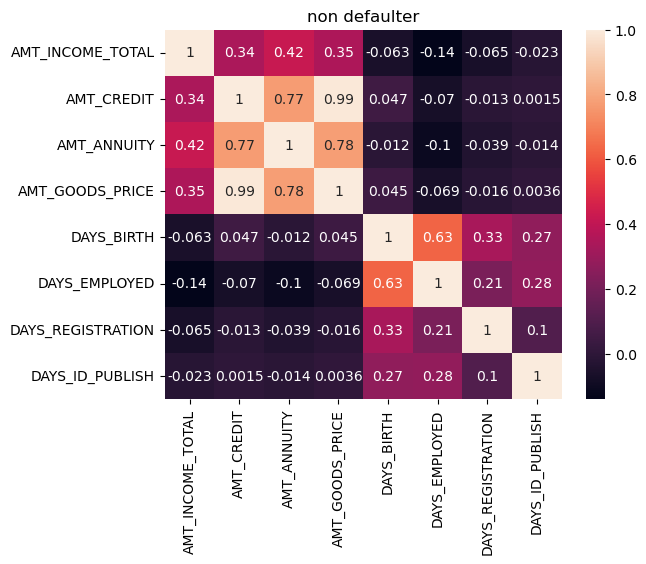

In [91]:
## Heat map of "Target 0"
sns.heatmap(target_0.corr(),annot=True)
plt.title("non defaulter")
plt.show()

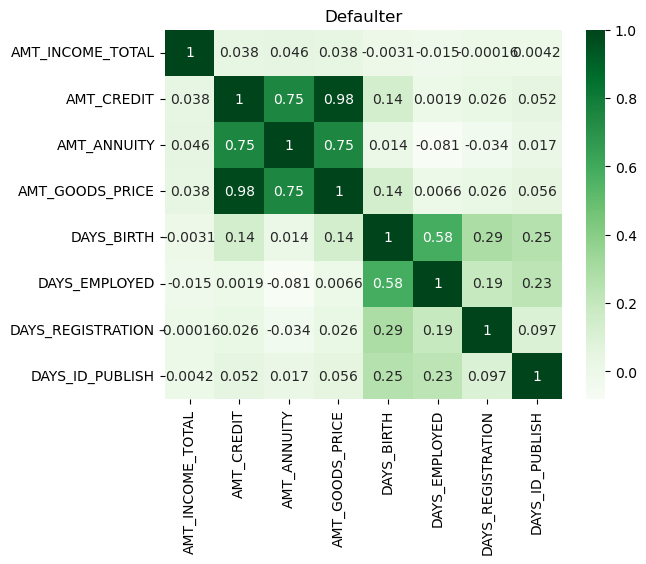

In [94]:
## Heat map for "Target 1"
sns.heatmap(target_1.corr(),cmap='Greens',annot=True)
plt.title("Defaulter")
plt.show()

In [45]:
application_data_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [46]:
#imput XNA with the mode of gender
application_data_df.loc[application_data_df['CODE_GENDER']=='XNA','CODE_GENDER'] = 'F'
application_data_df['CODE_GENDER'].value_counts()

F      202452
M      105059
XNA         0
Name: CODE_GENDER, dtype: int64

In [47]:
#Lets check the 'AMT_INCOME_TOTAL' and 'AMT_CREDIT' variables

In [48]:
application_data_df[['AMT_INCOME_TOTAL']].describe()

AMT_INCOME_TOTAL
count      3.075110e+05
mean       1.687979e+05
std        2.371231e+05
min        2.565000e+04
25%        1.125000e+05
50%        1.471500e+05
75%        2.025000e+05
max        1.170000e+08

In [49]:
application_data_df[['AMT_CREDIT']].describe()

AMT_CREDIT
count  3.075110e+05
mean   5.990260e+05
std    4.024908e+05
min    4.500000e+04
25%    2.700000e+05
50%    5.135310e+05
75%    8.086500e+05
max    4.050000e+06

In [50]:
bins=[0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,150000000]
ranges=['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000',
          '5000000 and above']

In [51]:
application_data_df['Amt_Income_Range'] = pd.cut(application_data_df['AMT_INCOME_TOTAL'],bins,labels=ranges)
application_data_df['Amt_Credit_Range'] = pd.cut(application_data_df['AMT_CREDIT'],bins,labels=ranges)

In [52]:
application_data_df[['Amt_Income_Range','Amt_Credit_Range']].describe()


Amt_Income_Range Amt_Credit_Range
count            307511           307511
unique               19               18
top       100000-250000    250000-500000
freq             204035            90135

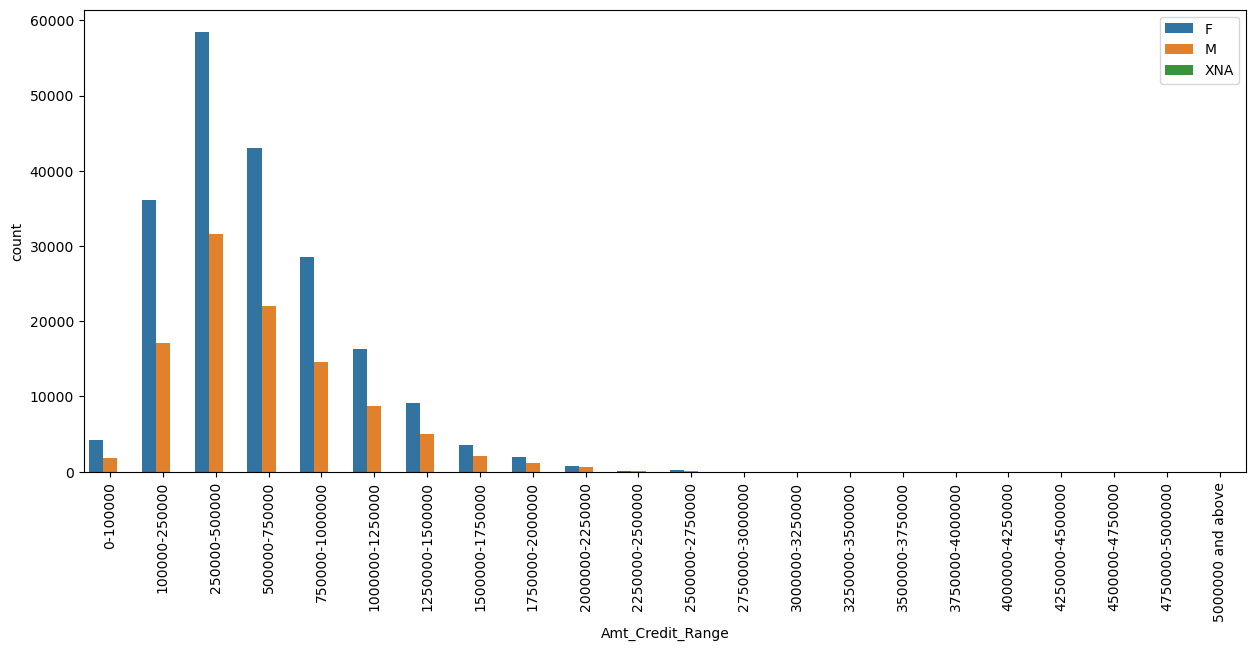

In [53]:
#plot counter plot on amount_credit
plt.figure(figsize=[15,6])
sns.countplot(data=application_data_df, x='Amt_Credit_Range', hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [54]:
###variables have outliers as we seen in describe

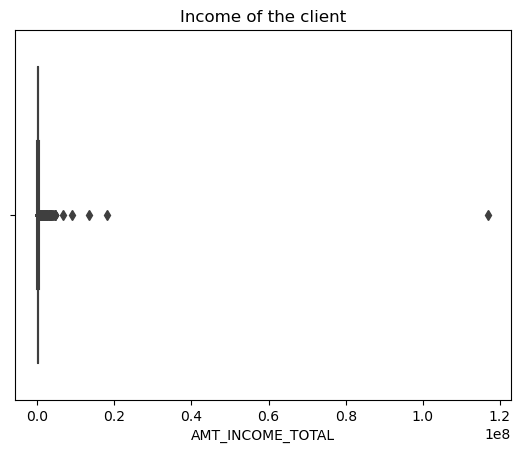

In [55]:
sns.boxplot(application_data_df['AMT_INCOME_TOTAL'])
plt.title("Income of the client")
plt.show()

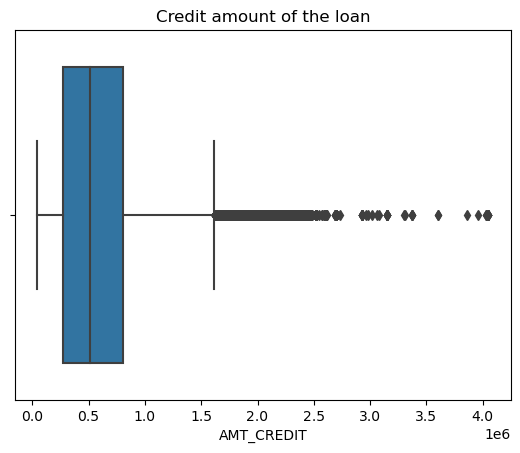

In [56]:
sns.boxplot(application_data_df['AMT_CREDIT'])
plt.title("Credit amount of the loan")
plt.show()

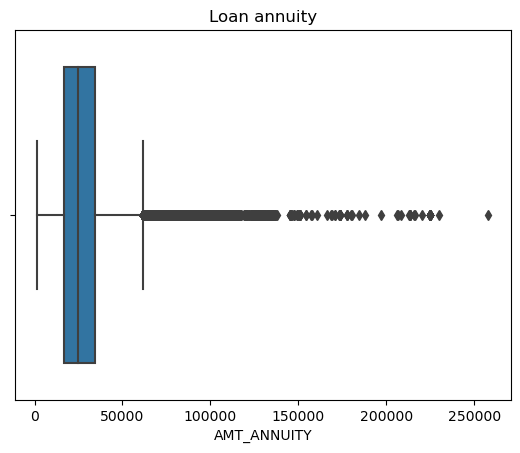

In [57]:
sns.boxplot(application_data_df['AMT_ANNUITY'])
plt.title("Loan annuity")
plt.show()

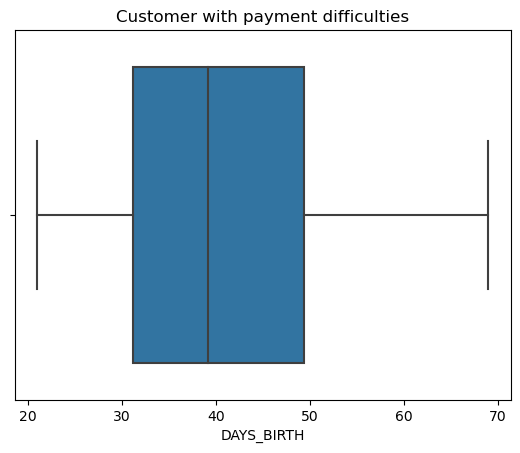

In [58]:
sns.boxplot(target_1['DAYS_BIRTH'])
plt.title('Customer with payment difficulties')
plt.show()

###### Here we can see that those who are in the age between 30 & 50 are having more dificulties in payments

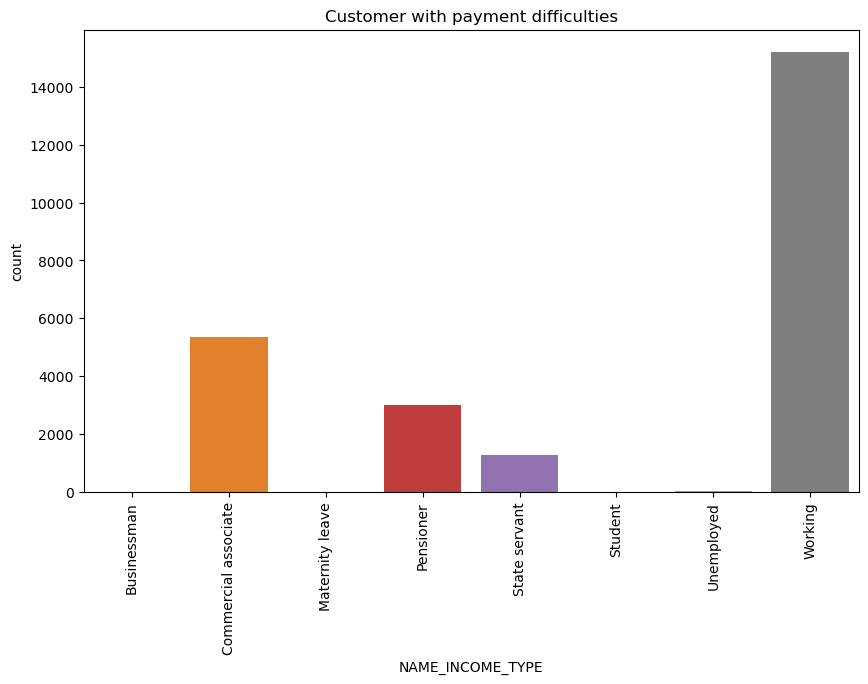

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(target_1['NAME_INCOME_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

##### Here we can see that "Working" personals are having more dificulties than other income types

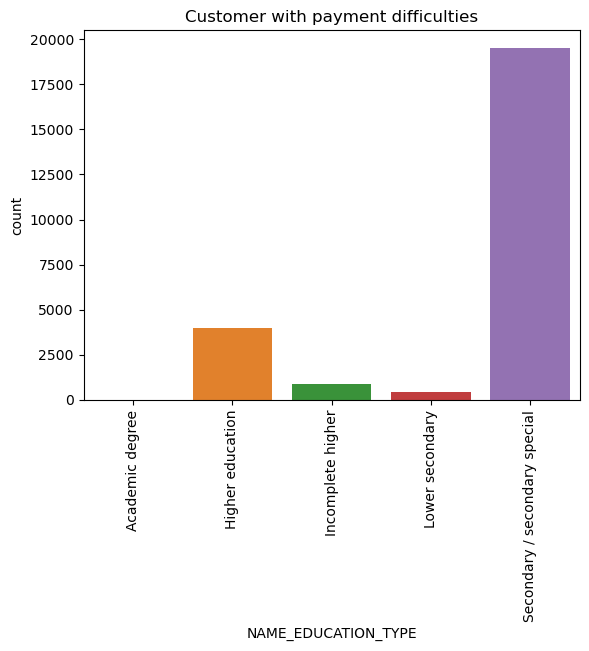

In [60]:
sns.countplot(target_1['NAME_EDUCATION_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

##### Here we can see that "Secondry / secondry special " personals are having more dificulties than other income types

and its around 20000

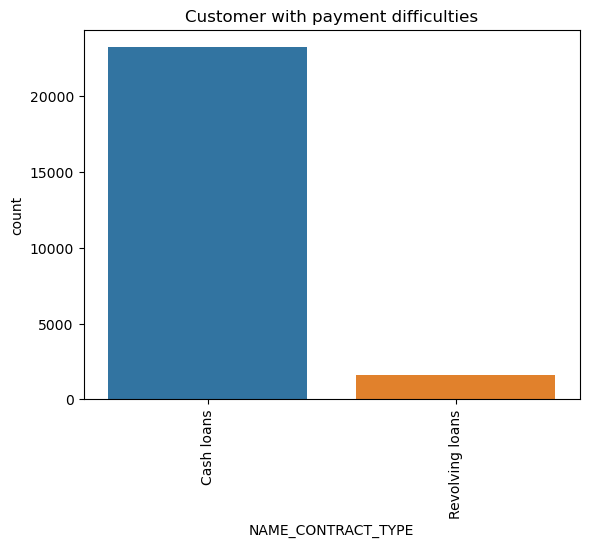

In [61]:
sns.countplot(target_1['NAME_CONTRACT_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

##### here it's clear that more dificulties are with those who took Cash Loans.

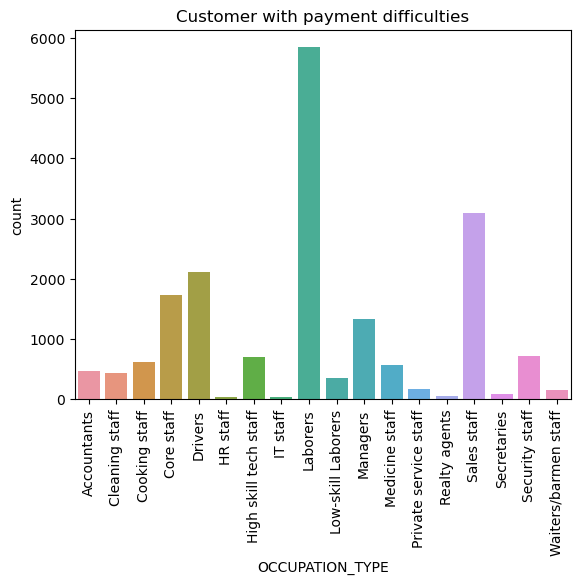

In [62]:
sns.countplot(target_1['OCCUPATION_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

#### Here we can see more than one type of peoples having difficulites

##### 1) Laborers are having more difficultis

##### 2) Sales staff

##### 3) Drivers

In [63]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  category
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   CNT_CHILDREN                307511 non-null  category
 5   AMT_INCOME_TOTAL            307511 non-null  float64 
 6   AMT_CREDIT                  307511 non-null  float64 
 7   AMT_ANNUITY                 307499 non-null  float64 
 8   AMT_GOODS_PRICE             307233 non-null  float64 
 9   NAME_INCOME_TYPE            307511 non-null  category
 10  NAME_EDUCATION_TYPE         307511 non-null  category
 11  NAME_HOUSING_TYPE           307511 non-null  category
 12  DAYS_BIRTH                  307511 non-null  float64 
 13 

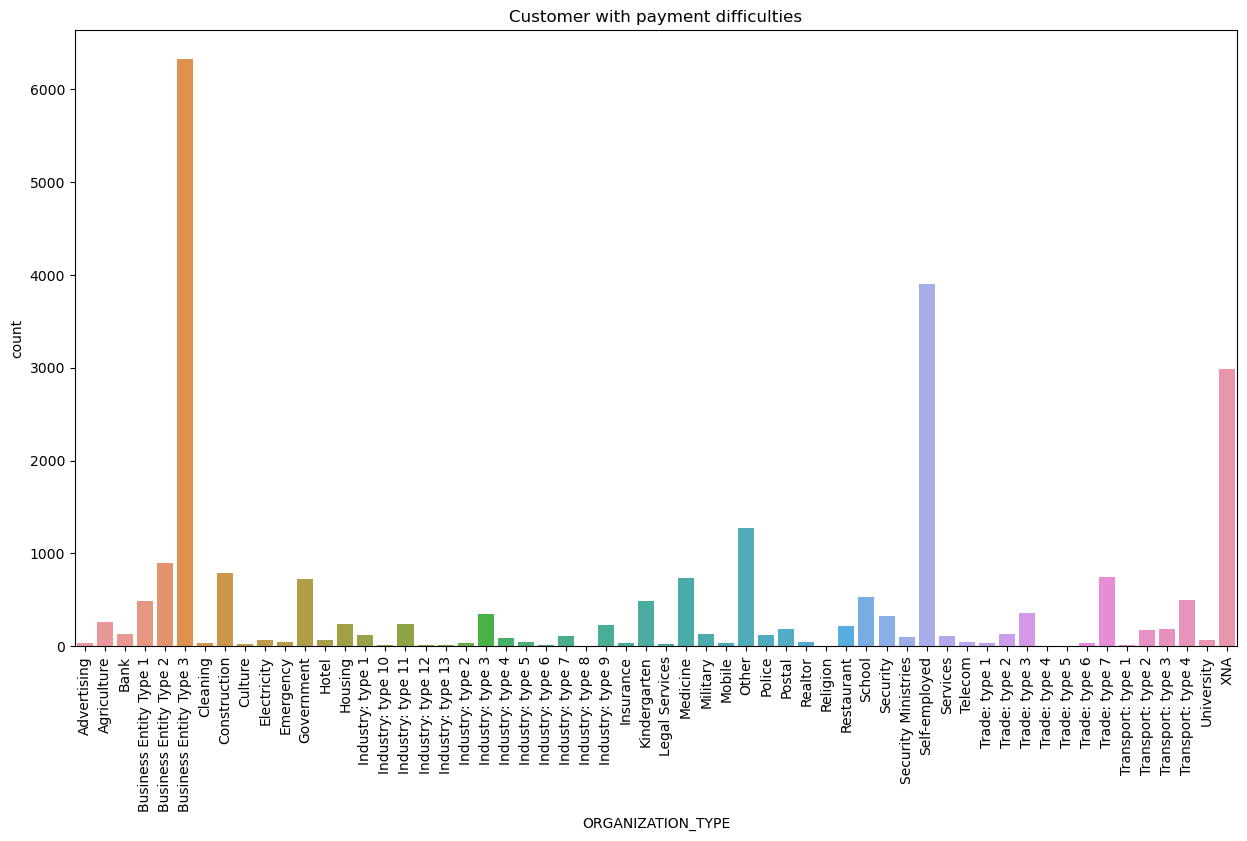

In [64]:
plt.figure(figsize=(15,8))
sns.countplot(target_1['ORGANIZATION_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

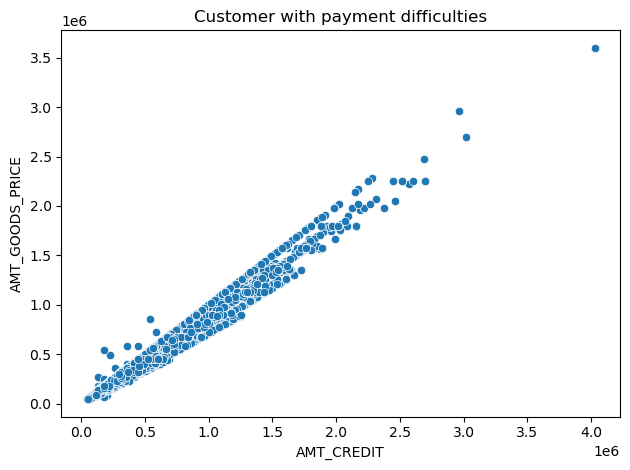

In [65]:
sns.scatterplot(data=target_1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer with payment difficulties')
plt.tight_layout()

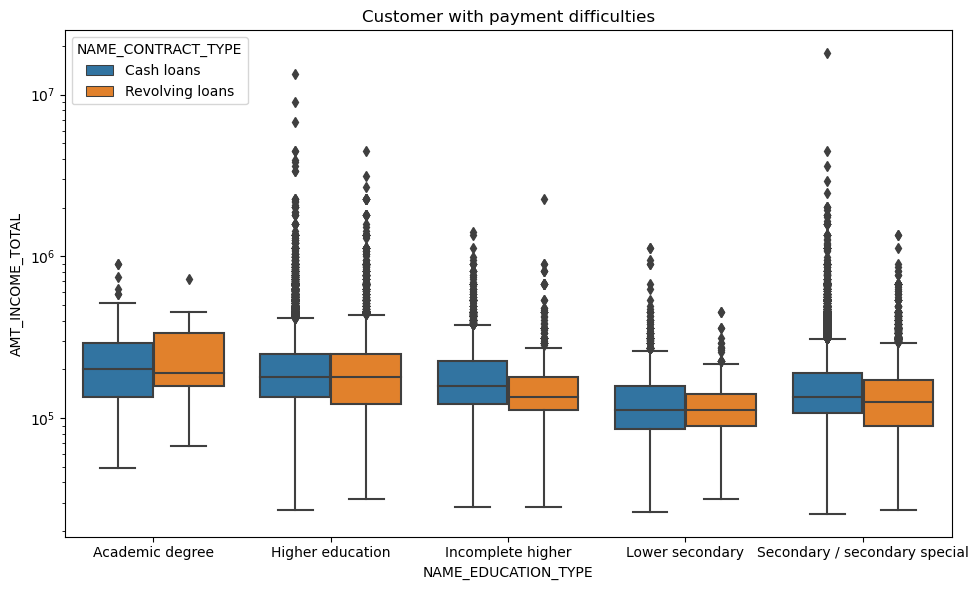

In [95]:
plt.figure(figsize=(10,6))
plt.yscale('log')
sns.boxplot(data=target_0,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_CONTRACT_TYPE',orient='v')
plt.title('Customer with payment difficulties')
plt.tight_layout()

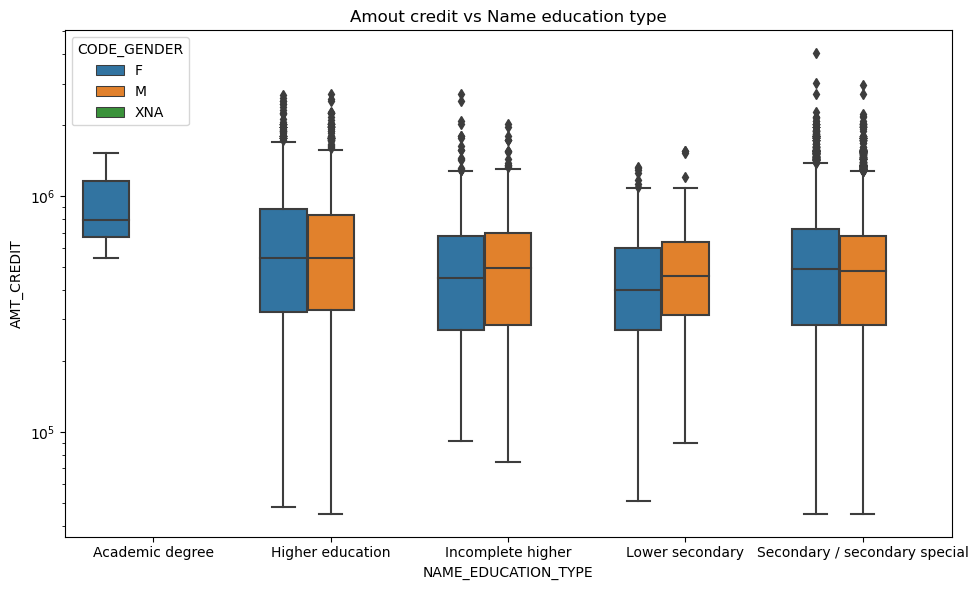

In [67]:
plt.figure(figsize=(10,6))

plt.yscale('log')
sns.boxplot(data=target_1,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='CODE_GENDER',orient='v')
plt.title('Amout credit vs Name education type')
plt.tight_layout()

Clients with `Academic Degree` have a wide range of credits for OnTime
Payments whereas the range is much lower for ones with Payment
difficulties

•- Looking at summary statistics, Clients with `Academic Degree` and
Payment difficulties take mean and median credit at a much higher range
than On-Time Payment clients

•- `Male` clients with `Academic Degree` always pay the loan on-tim

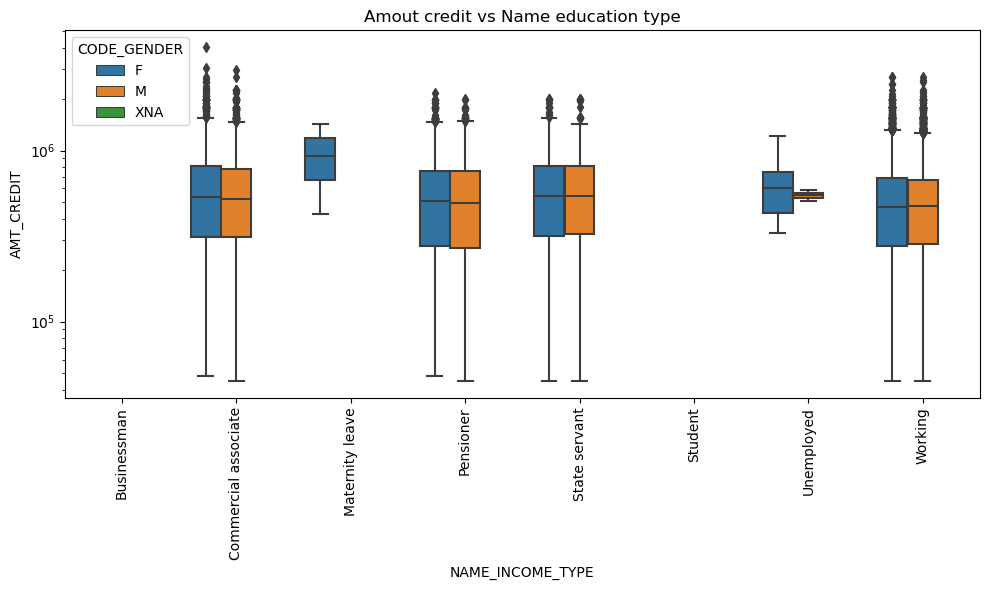

In [68]:
plt.figure(figsize=(10,6))
plt.yscale('log')
sns.boxplot(data=target_1,x='NAME_INCOME_TYPE',y='AMT_CREDIT',hue='CODE_GENDER',orient='v')
plt.xticks(rotation=90)
plt.title('Amout credit vs Name education type')
plt.tight_layout()

In [69]:
previous_data=pd.read_csv(r'C:\Users\yasha\Downloads\previous_application (2).csv')
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [70]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [71]:
previous_data.shape

(1670214, 37)

In [72]:
# merging the application data with previous application data

merge_data_df = pd.merge(left=application_data,right=previous_data,how='inner',on='SK_ID_CURR')
merge_data_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0        24700.5  ...       Auto technology        24.0       low_normal   
1        35698.5  ...                   XNA        12.0       low_normal   
2        35698.5  ...             Furniture         6.0           middle   
3        35698.5  ...  Consumer electronics        12.0           middle   
4         6750.0  ...          Connectivity         4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest           365243.0         -565.0   
1             Cash X-Sell: low           365243.0         -716.0   
2   POS industry with interest           365243.0         -797.0   
3  POS household with interest           365243.0        -2310.0   
4  POS mobile without interest           365243.0         -784.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      125.0          -25.0             -17.0   
1                     -386.0         -536.0            -527.0   
2                     -647.0         -647.0            -639.0   
3                    -1980.0        -1980.0           -1976.0   
4                     -694.0         -724.0            -714.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        0.0  
3                        1.0  
4                        0.0  

[5 rows x 158 columns]

In [73]:
# lets check the percentage of 'NAME_CONTRACT_STATUS'
merge_data_df['NAME_CONTRACT_STATUS'].describe

<bound method NDFrame.describe of 0          Approved
1          Approved
2          Approved
3          Approved
4          Approved
             ...   
1413696    Approved
1413697     Refused
1413698     Refused
1413699    Approved
1413700    Approved
Name: NAME_CONTRACT_STATUS, Length: 1413701, dtype: object>

In [74]:
merge_data_df['NAME_CONTRACT_STATUS'].value_counts(normalize=True)

Approved        0.626794
Canceled        0.183519
Refused         0.173580
Unused offer    0.016107
Name: NAME_CONTRACT_STATUS, dtype: float64

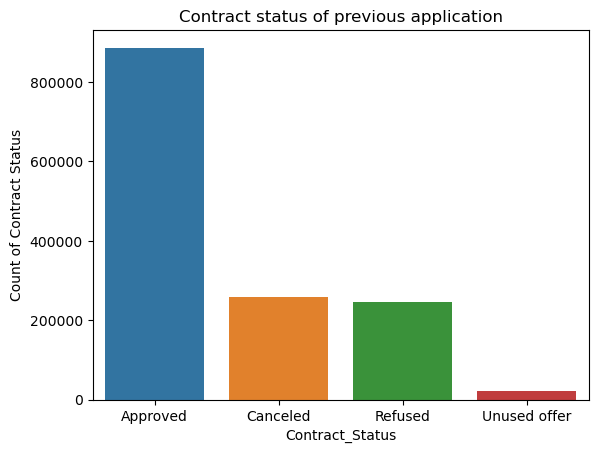

In [75]:
sns.countplot(merge_data_df['NAME_CONTRACT_STATUS'])
plt.xlabel('Contract_Status')
plt.ylabel('Count of Contract Status')
plt.title("Contract status of previous application")
plt.show()

In [76]:
approved_df = merge_data_df[merge_data_df['NAME_CONTRACT_STATUS']=='Approved']
refused_df = merge_data_df[merge_data_df['NAME_CONTRACT_STATUS']=='Refused']
canceled_df=merge_data_df[merge_data_df['NAME_CONTRACT_STATUS']=='Canceled']
unused_df=merge_data_df[merge_data_df['NAME_CONTRACT_STATUS']=='Unused offer']

In [77]:
# now `check the percentage of each type of contract status
merge_data_df['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

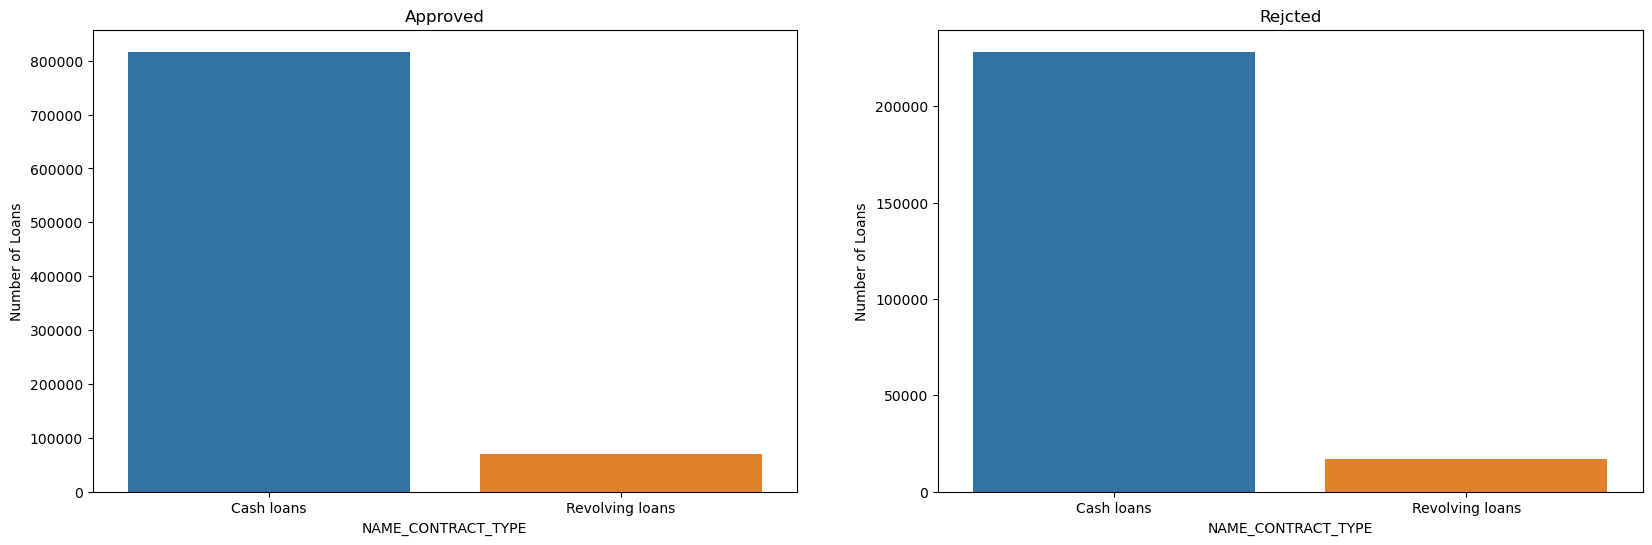

In [78]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(data=approved_df,x='NAME_CONTRACT_TYPE_x')
plt.title('Approved')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Number of Loans')
plt.subplot(1,2,2)
sns.countplot(data=refused_df,x='NAME_CONTRACT_TYPE_x')
plt.title('Rejcted')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Number of Loans')
plt.show()

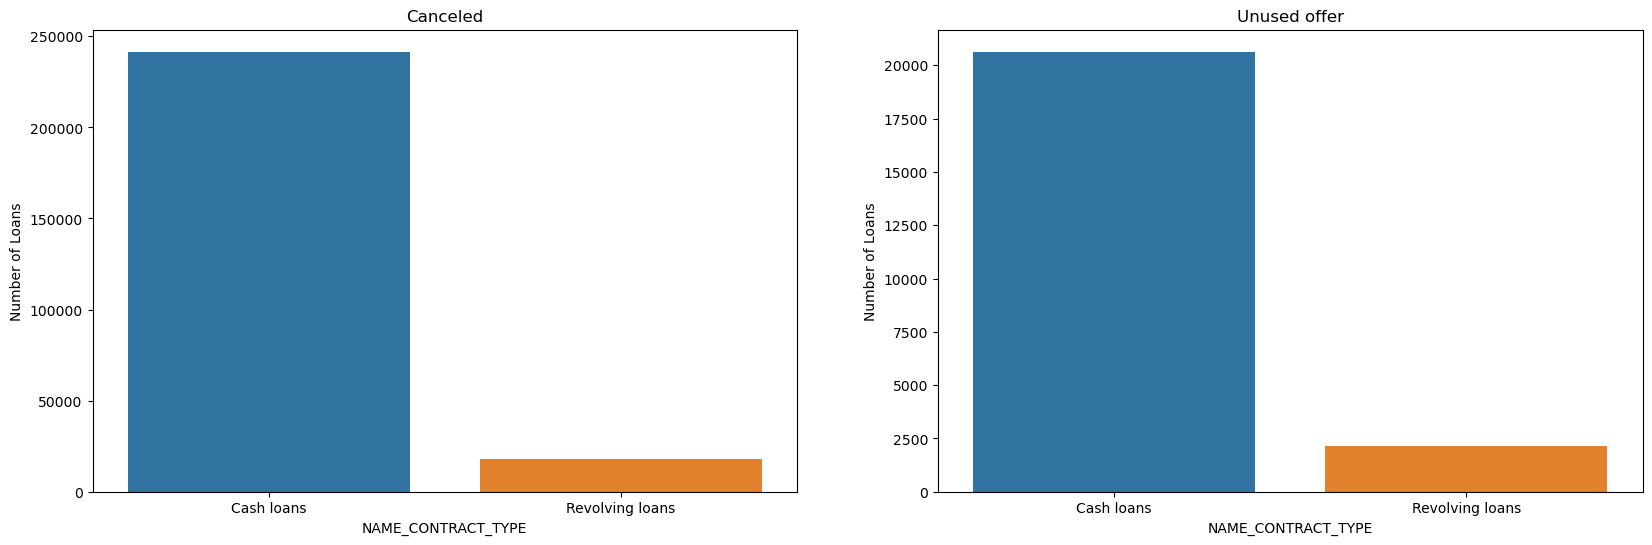

In [79]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(data=canceled_df,x='NAME_CONTRACT_TYPE_x')
plt.title('Canceled')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Number of Loans')
plt.subplot(1,2,2)
sns.countplot(data=unused_df,x='NAME_CONTRACT_TYPE_x')
plt.title('Unused offer')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Number of Loans')
plt.show()

##### Here we can see that the Revolving loan is much more acceptable as compare to the cash and consumer loans

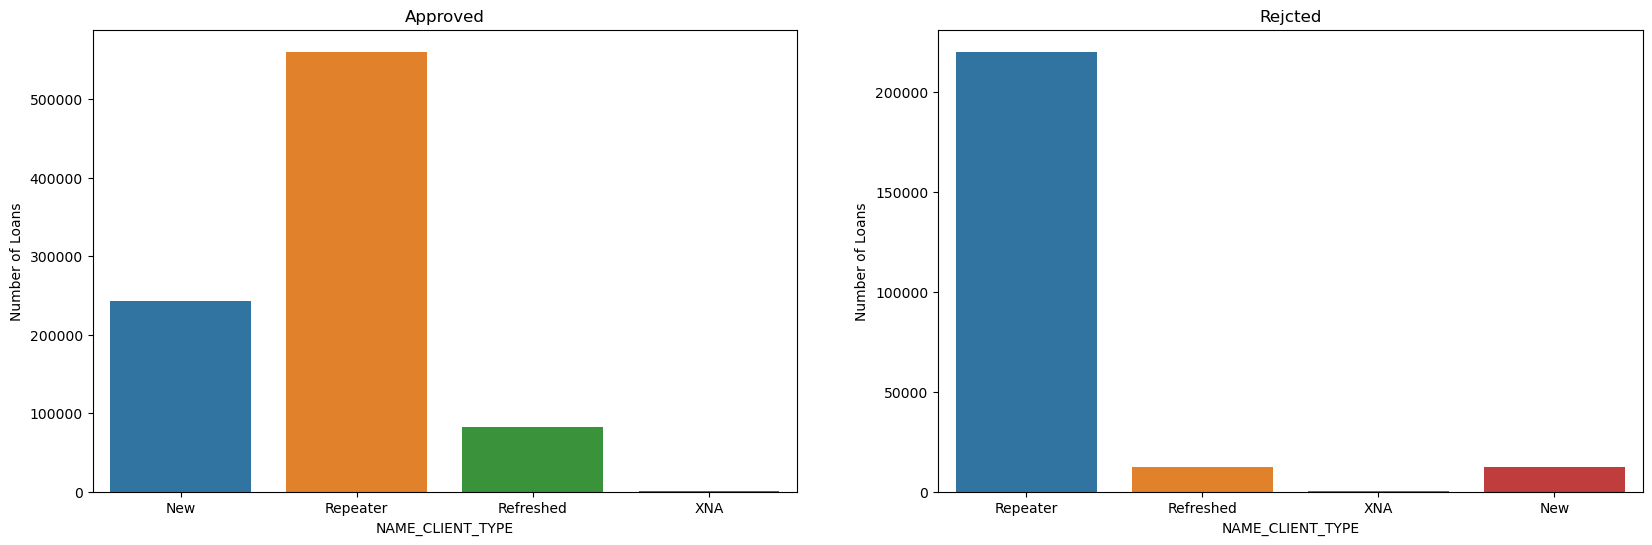

In [80]:
##Analysis on variable 'NAME_CLIENT_TYPE' 
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(data=approved_df,x='NAME_CLIENT_TYPE')
plt.title('Approved')
plt.xlabel('NAME_CLIENT_TYPE')
plt.ylabel('Number of Loans')
plt.subplot(1,2,2)
sns.countplot(data=refused_df,x='NAME_CLIENT_TYPE')
plt.title('Rejcted')
plt.xlabel('NAME_CLIENT_TYPE')
plt.ylabel('Number of Loans')
plt.show()

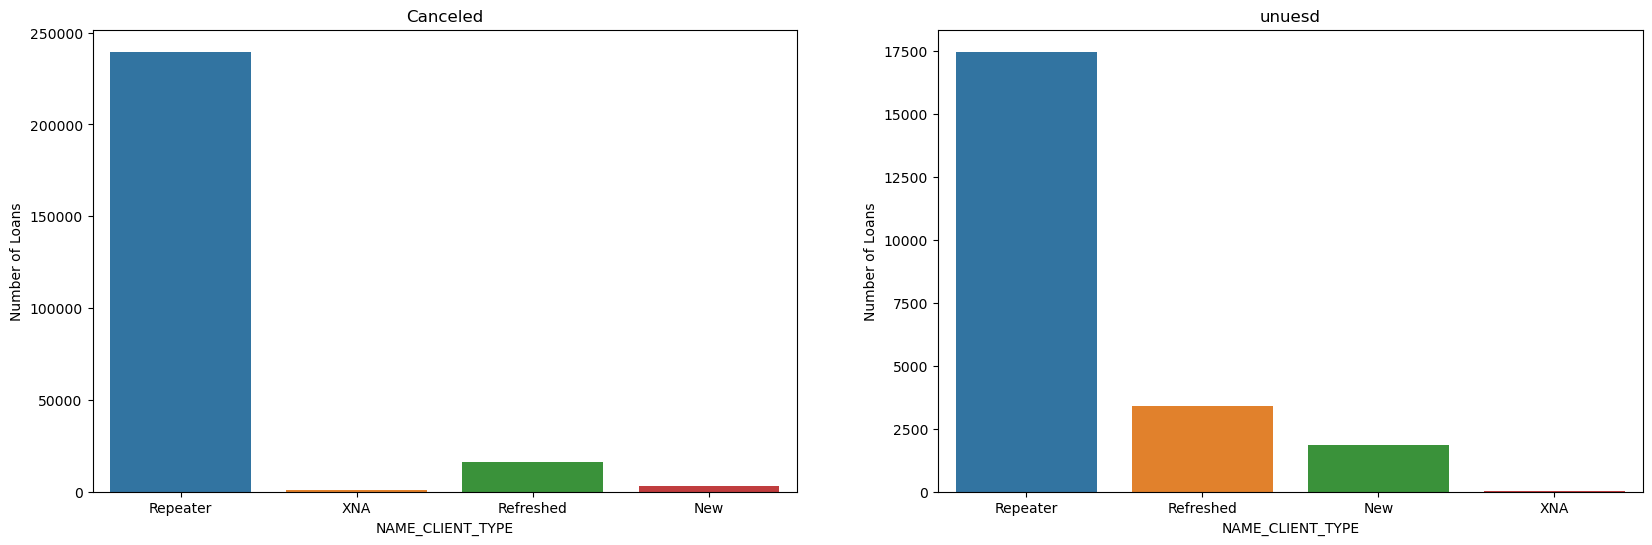

In [81]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(data=canceled_df,x='NAME_CLIENT_TYPE')
plt.title('Canceled')
plt.xlabel('NAME_CLIENT_TYPE')
plt.ylabel('Number of Loans')
plt.subplot(1,2,2)
sns.countplot(data=unused_df,x='NAME_CLIENT_TYPE')
plt.title('unuesd')
plt.xlabel('NAME_CLIENT_TYPE')
plt.ylabel('Number of Loans')
plt.show()

##### Here we can see that the Repeater is getting more Refused.,

##### but also we can see that the it also getting more apporved and even that it is getting more canceled and more usused.

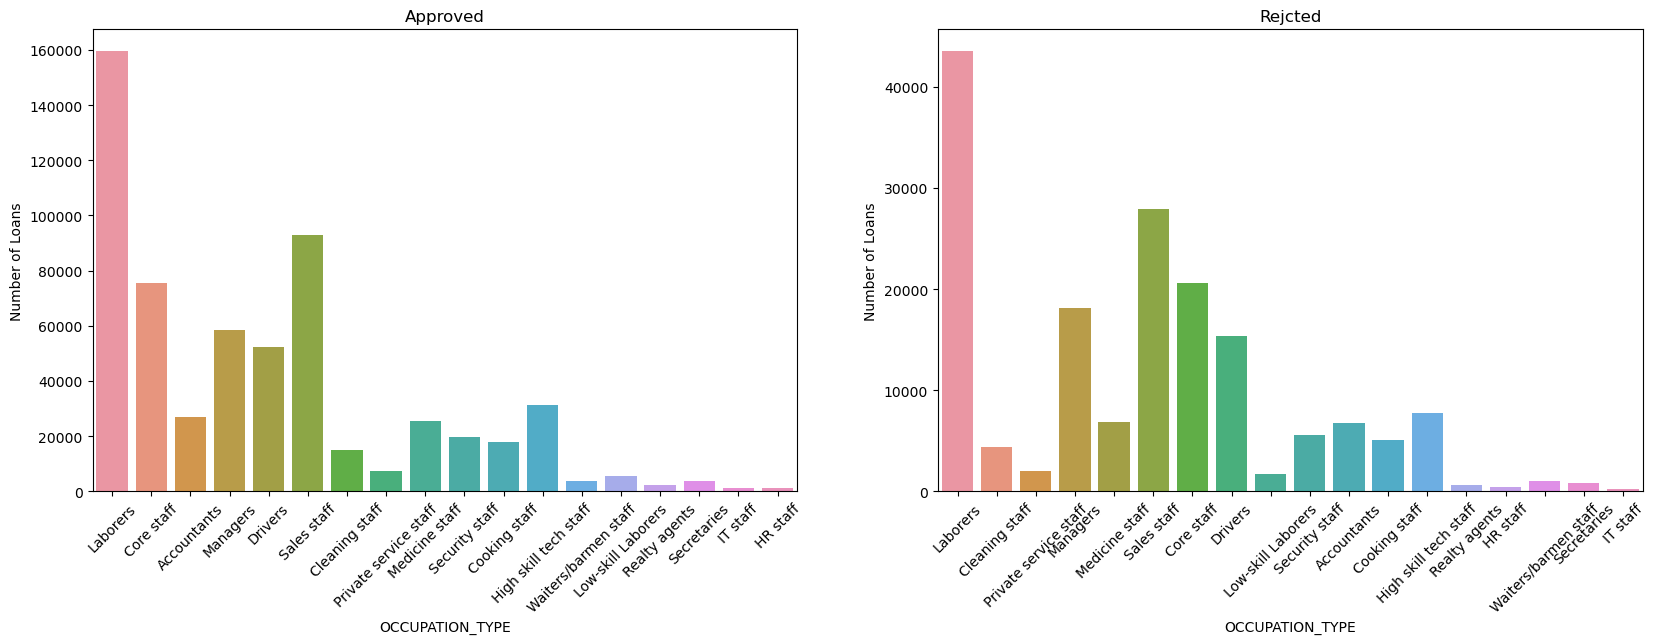

In [82]:
##Analysis on variable 'OCCUPATION_TYPE' 
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(data=approved_df,x='OCCUPATION_TYPE')
plt.title('Approved')
plt.xticks(rotation=45)
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Number of Loans')
plt.subplot(1,2,2)
sns.countplot(data=refused_df,x='OCCUPATION_TYPE')
plt.title('Rejcted')
plt.xticks(rotation=45)
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Number of Loans')
plt.show()

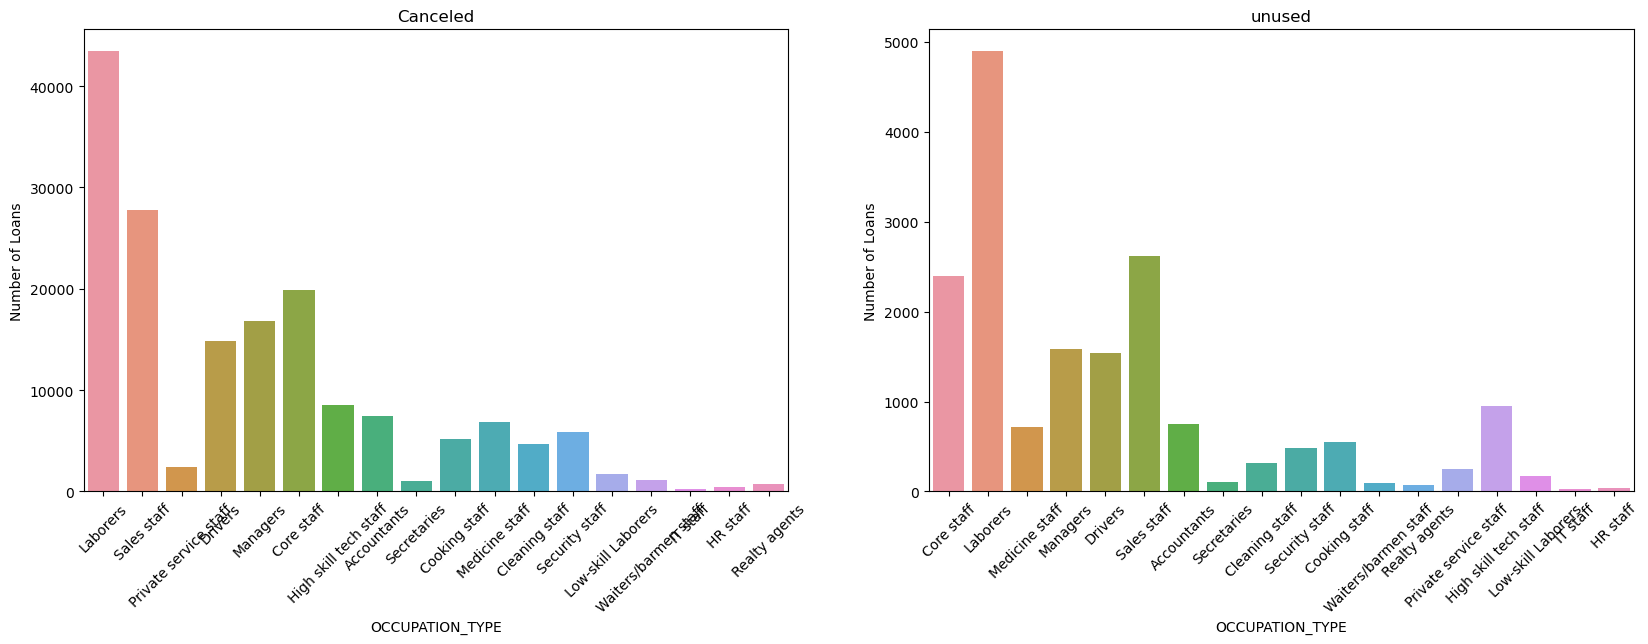

In [83]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(data=canceled_df,x='OCCUPATION_TYPE')
plt.title('Canceled')
plt.xticks(rotation=45)
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Number of Loans')
plt.subplot(1,2,2)
sns.countplot(data=unused_df,x='OCCUPATION_TYPE')
plt.title('unused')
plt.xticks(rotation=45)
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Number of Loans')
plt.show()

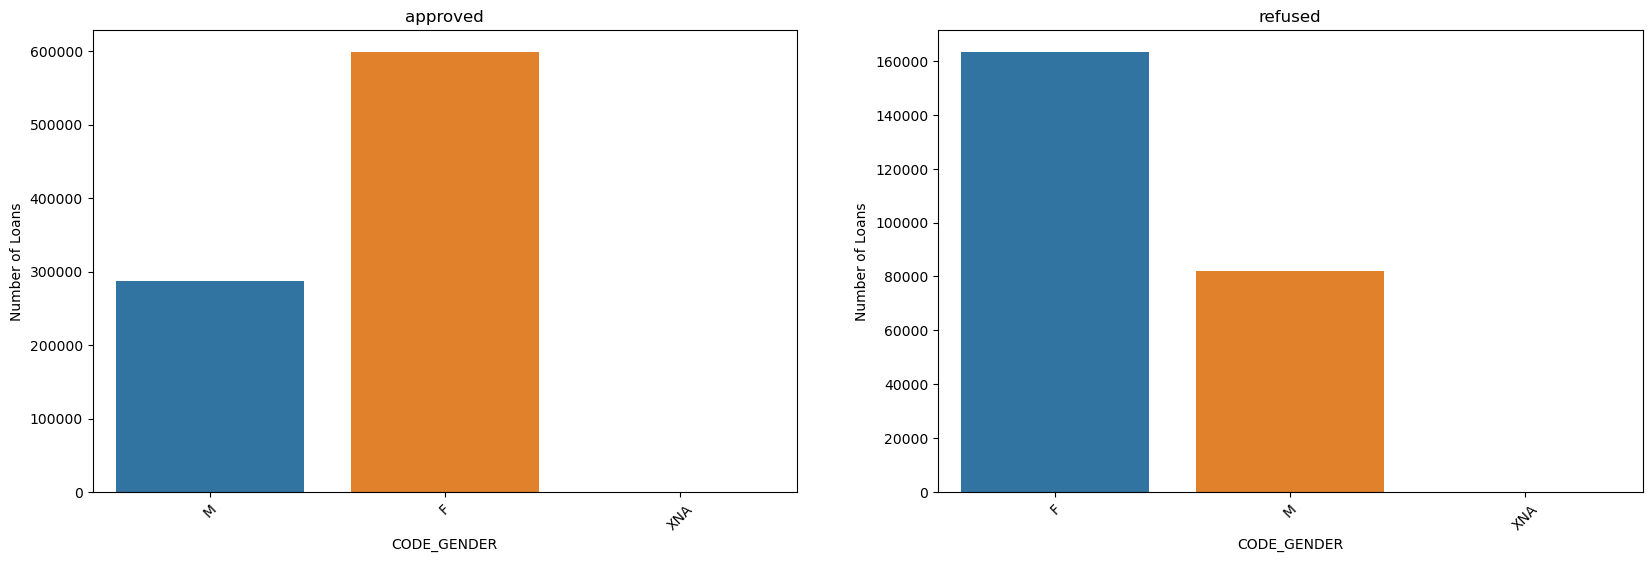

In [84]:
##Analysis on variable 'CODE_GENDER'
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(data=approved_df,x='CODE_GENDER')
plt.title('approved')
plt.xticks(rotation=45)
plt.xlabel('CODE_GENDER')
plt.ylabel('Number of Loans')
plt.subplot(1,2,2)
sns.countplot(data=refused_df,x='CODE_GENDER')
plt.title('refused')
plt.xticks(rotation=45)
plt.xlabel('CODE_GENDER')
plt.ylabel('Number of Loans')
plt.show()

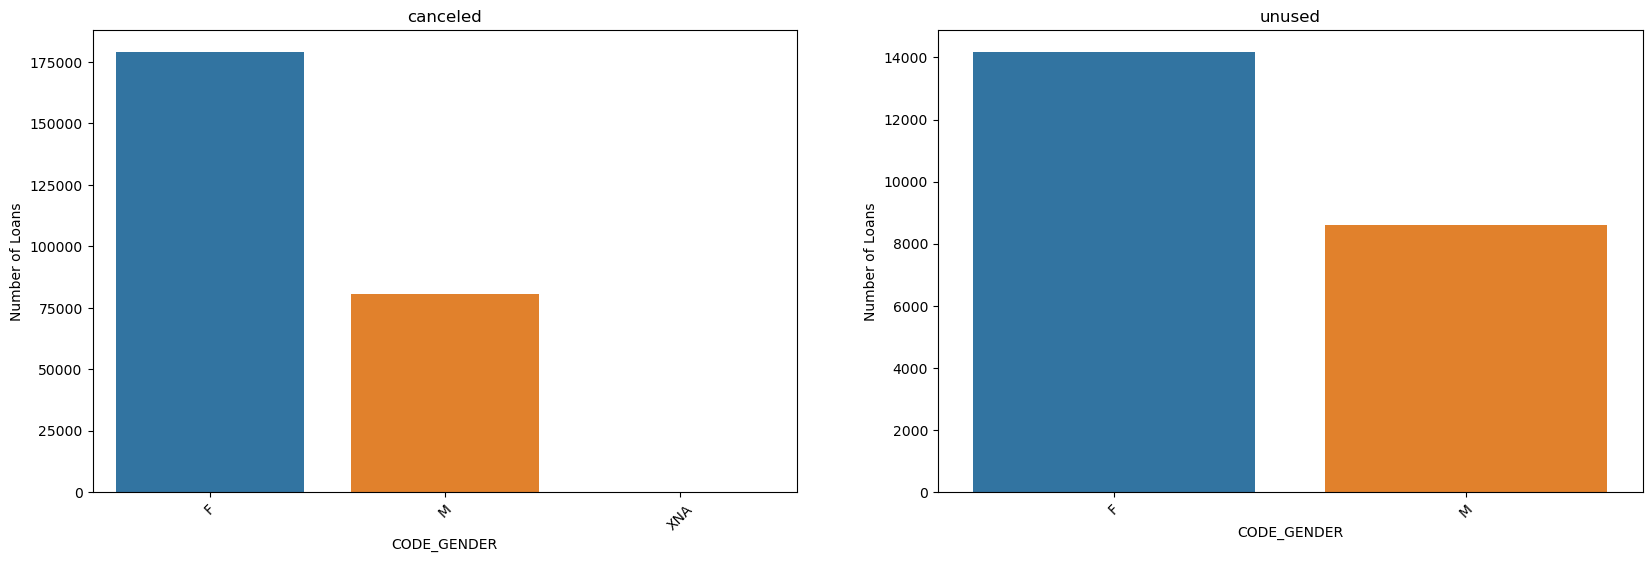

In [85]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(data=canceled_df,x='CODE_GENDER')
plt.title('canceled')
plt.xticks(rotation=45)
plt.xlabel('CODE_GENDER')
plt.ylabel('Number of Loans')
plt.subplot(1,2,2)
sns.countplot(data=unused_df,x='CODE_GENDER')
plt.title('unused')
plt.xticks(rotation=45)
plt.xlabel('CODE_GENDER')
plt.ylabel('Number of Loans')
plt.show()

###### here we can see that most of the loans are approved for female than male

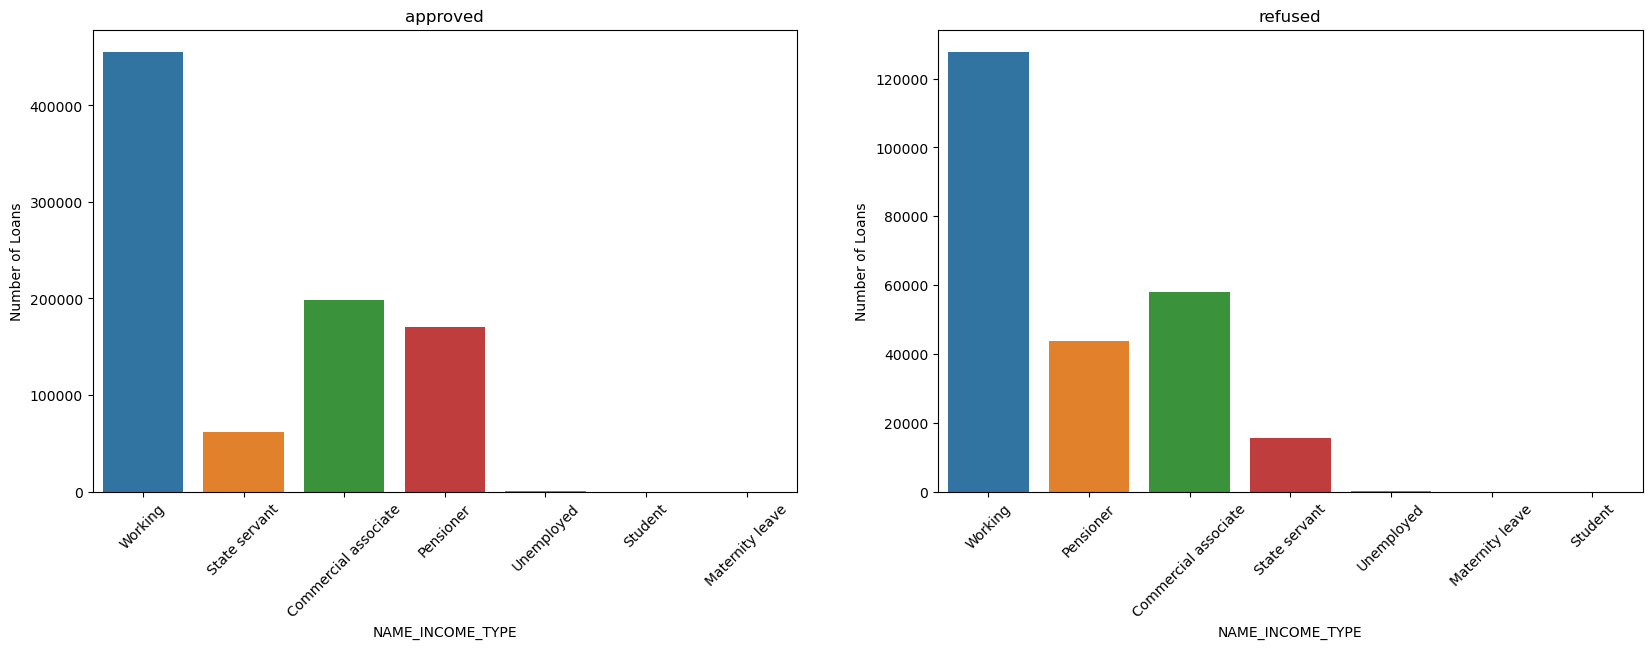

In [86]:
##Analysis on variable 'NAME_INCOME_TYPE'
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(data=approved_df,x='NAME_INCOME_TYPE')
plt.title('approved')
plt.xticks(rotation=45)
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Number of Loans')
plt.subplot(1,2,2)
sns.countplot(data=refused_df,x='NAME_INCOME_TYPE')
plt.title('refused')
plt.xticks(rotation=45)
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Number of Loans')
plt.show()

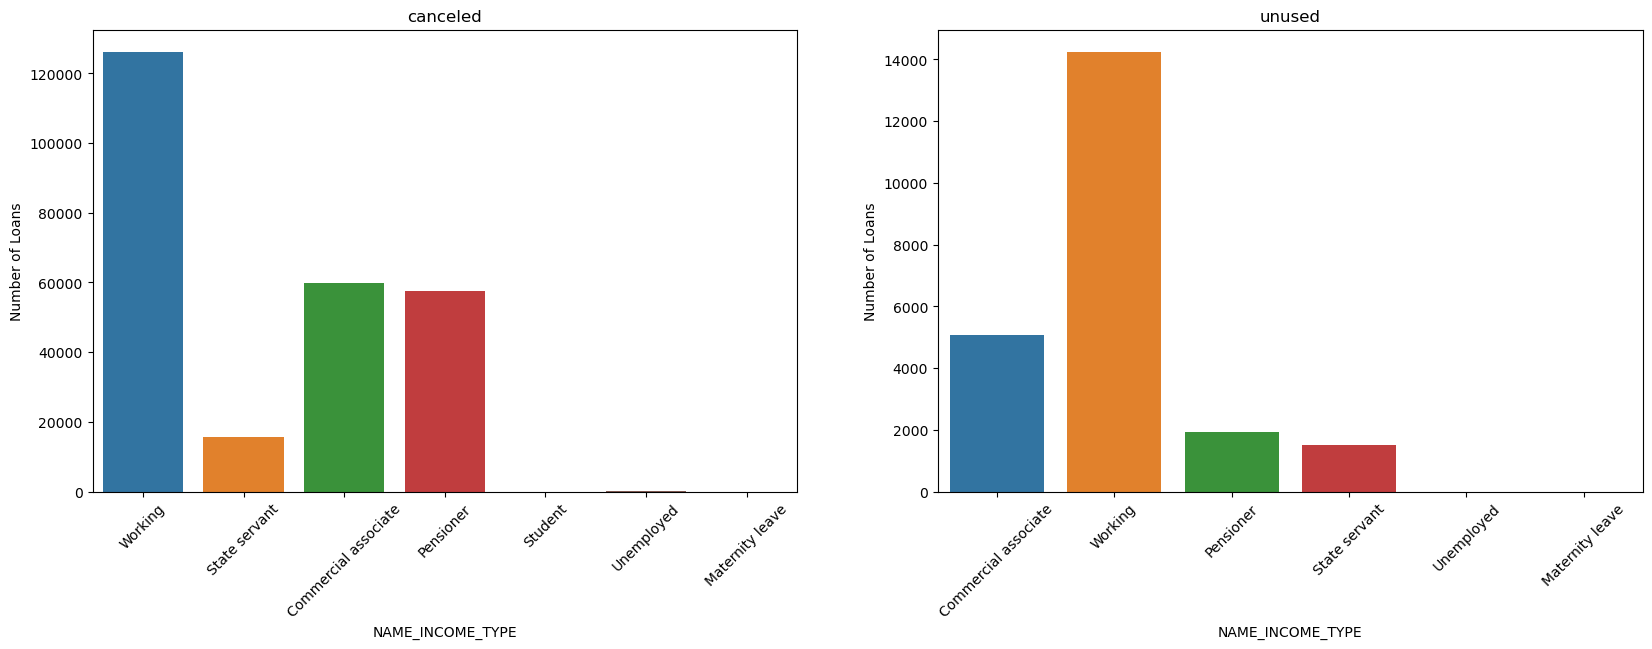

In [87]:
##Analysis on variable 'NAME_INCOME_TYPE'
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(data=canceled_df,x='NAME_INCOME_TYPE')
plt.title('canceled')
plt.xticks(rotation=45)
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Number of Loans')
plt.subplot(1,2,2)
sns.countplot(data=unused_df,x='NAME_INCOME_TYPE')
plt.title('unused')
plt.xticks(rotation=45)
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Number of Loans')
plt.show()